<a href="https://colab.research.google.com/github/Godwin-Anku/Multinomial-Classification---Multilayer-Perceptron-Fashion-MNIST-Dataset-/blob/main/Multilayer_Perceptron_(MLPs)_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.datasets import fashion_mnist
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [2]:
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [3]:
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [4]:
(X_train_all, y_train_all), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
X_train_all[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
print(f'Train predictor dataset dimensions: {X_train_all.shape}')
print(f'Test predictor dataset dimensions: {X_test.shape}')
print(f'Train target dataset dimensions: {y_train_all.shape}')
print(f'Test target dataset dimensions: {y_test.shape}')

Train predictor dataset dimensions: (60000, 28, 28)
Test predictor dataset dimensions: (10000, 28, 28)
Train target dataset dimensions: (60000,)
Test target dataset dimensions: (10000,)


In [7]:
X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]
y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

In [8]:
y_train[:10]

array([8, 7, 6, 8, 7, 7, 2, 0, 5, 3], dtype=uint8)

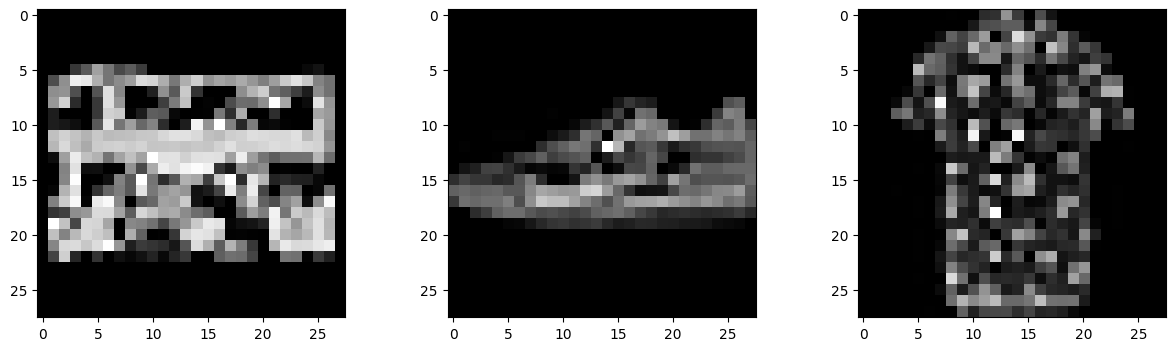

In [9]:
plt.figure(figsize = (15, 4))

for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.axis(True)
  plt.imshow(X_train[i], cmap = 'gray')
  plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

In [10]:
print(f'Train predictor dataset dimensions: {X_train.shape}')
print(f'Test predictor dataset dimensions: {X_test.shape}')
print(f'Validation predictor dataset dimensions: {X_valid.shape}')
print(f'Train target dataset dimensions: {y_train.shape}')
print(f'Test target dataset dimensions: {y_test.shape}')
print(f'Validation target dataset dimensions: {y_valid.shape}')

Train predictor dataset dimensions: (50000, 28, 28)
Test predictor dataset dimensions: (10000, 28, 28)
Validation predictor dataset dimensions: (10000, 28, 28)
Train target dataset dimensions: (50000,)
Test target dataset dimensions: (10000,)
Validation target dataset dimensions: (10000,)


In [11]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255
X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype('float32') / 255

In [12]:
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
y_train[:10]

array([8, 7, 6, 8, 7, 7, 2, 0, 5, 3], dtype=uint8)

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

In [15]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
training_results = model.fit(X_train, y_train, epochs = 21, batch_size = 64, validation_data = (X_valid, y_valid));

Epoch 1/21
782/782 [==============================] - 9s 10ms/step - loss: 0.5376 - accuracy: 0.8071 - val_loss: 0.4635 - val_accuracy: 0.8373
Epoch 2/21
782/782 [==============================] - 3s 4ms/step - loss: 0.3865 - accuracy: 0.8575 - val_loss: 0.4102 - val_accuracy: 0.8412
Epoch 3/21
782/782 [==============================] - 3s 4ms/step - loss: 0.3450 - accuracy: 0.8735 - val_loss: 0.3569 - val_accuracy: 0.8671
Epoch 4/21
782/782 [==============================] - 4s 6ms/step - loss: 0.3219 - accuracy: 0.8816 - val_loss: 0.4005 - val_accuracy: 0.8591
Epoch 5/21
782/782 [==============================] - 3s 4ms/step - loss: 0.3036 - accuracy: 0.8880 - val_loss: 0.3674 - val_accuracy: 0.8732
Epoch 6/21
782/782 [==============================] - 3s 4ms/step - loss: 0.2915 - accuracy: 0.8922 - val_loss: 0.4007 - val_accuracy: 0.8509
Epoch 7/21
782/782 [==============================] - 4s 5ms/step - loss: 0.2799 - accuracy: 0.8974 - val_loss: 0.4002 - val_accuracy: 0.8643
Epoch

In [19]:
X_train_loss = training_results.history['loss']
X_valid_loss = training_results.history['val_loss']
X_train_acc = training_results.history['accuracy']
X_valid_acc = training_results.history['val_accuracy']

In [20]:
def plot_results(metrics, metric_name = None, color = None, ylabel = None, ylim = None, title = None):
  fig, ax = plt.subplots(figsize = (15, 6))

  if not (isinstance(metric_name, list) or (metric_name, tuple)):
    metrics = [metrics,]
    metric_name = [metric_name,]

  for idx, metric in enumerate(metrics):
    ax.plot(metric, color = color[idx])

  plt.xlabel('Epoch')
  plt.ylabel(ylabel)
  plt.xlim(0, len(X_train_loss))
  plt.ylim(ylim)
  plt.title(title)
  plt.grid(True)
  plt.legend(metric_name)
  ax.xaxis.set_major_locator(MultipleLocator(5))
  ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
  ax.xaxis.set_minor_locator(MultipleLocator(1))
  plt.show()
  plt.close()

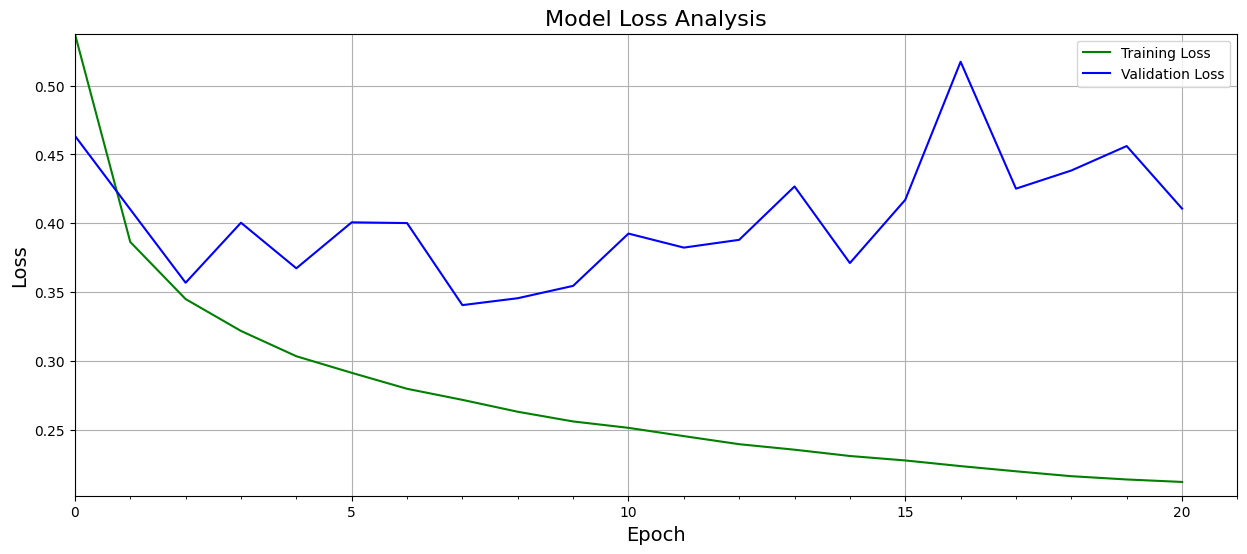

In [21]:
plot_results(metrics = [X_train_loss, X_valid_loss], metric_name = ['Training Loss', 'Validation Loss'], color = ['g', 'b'], ylabel = 'Loss', ylim = [min(X_train_loss)-0.01, max(X_train_loss)], title = 'Model Loss Analysis')

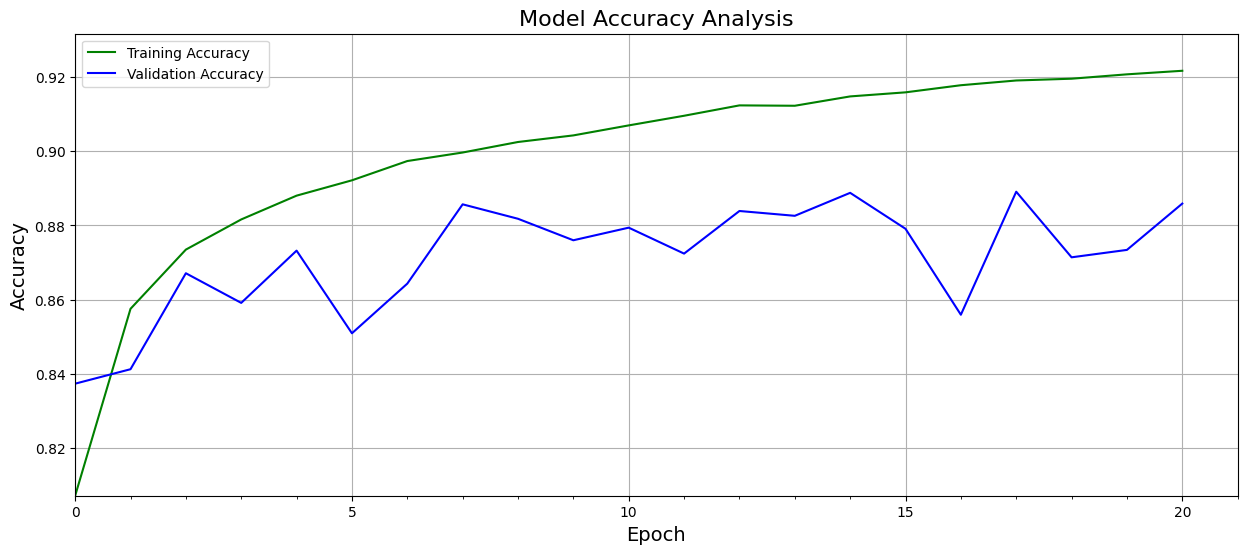

In [22]:
plot_results(metrics = [X_train_acc, X_valid_acc], metric_name = ['Training Accuracy', 'Validation Accuracy'], color = ['g', 'b'], ylabel = 'Accuracy', ylim = [min(X_train_acc), max(X_train_acc)+0.01], title = 'Model Accuracy Analysis')

In [23]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
final_output = {'T-short/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle Boot': 9}

In [37]:
index = 31
index_label = np.argmax(predictions[index])
class_label = None
for key, value in final_output.items():
  if value == index_label:
    class_label = key
    break
print(f'Ground Truth class label = {class_label} : {value}\n')
for i in range(10):
  print(f'Index Label: {i}\t\tProbability: {predictions[index][i]}')

p_class_l_index = np.argmax(predictions[index])

p_class_label = None
for p_key, p_value in final_output.items():
  if p_value == p_class_l_index:
    p_class_label = p_key
    break
print(f'Predicted object: {p_class_label} : {p_class_l_index}')

Ground Truth class label = Bag : 8

Index Label: 0		Probability: 7.908069607031422e-20
Index Label: 1		Probability: 2.621879021506982e-35
Index Label: 2		Probability: 1.7004452712458057e-25
Index Label: 3		Probability: 2.5068802409779605e-18
Index Label: 4		Probability: 3.943141194154966e-17
Index Label: 5		Probability: 4.160014892944919e-21
Index Label: 6		Probability: 1.7621409202171542e-20
Index Label: 7		Probability: 1.2869895063089712e-19
Index Label: 8		Probability: 0.9999999403953552
Index Label: 9		Probability: 4.7499947488479234e-30
Predicted object: Bag : 8
